In [3]:
# for each algorithm add best validation method or sort validation methods per problem type

In [4]:
# for each problem type best algorithm?

# Instruction

--> tool (algorithm/validation/regression)
- why is it important

--> problem type (supervised/not supervised/autoregression)
- explanation

--> label type (continuous/category)

--> algorithm (regression/tress/...)
- why this one?
- main advantage
- compare to some other
- important hiperparameters

--> tool
- implementation

# Table of contents

In [5]:
# same as below but without info

# Notebook's data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as toy_datasets

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

In [8]:
noise = np.random.uniform(0.95, 1.05, 101)

## Exponential

In [9]:
exp_data = pd.concat([
    pd.Series(np.linspace(0, 3, 101), name = 'X'),
    pd.Series(np.exp(np.linspace(0, 3, 101)) * noise, name = 'Y')
], axis = 1)

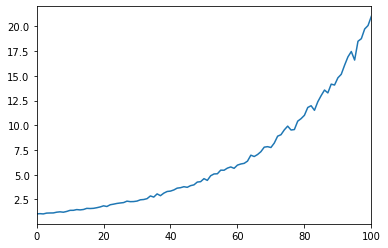

In [10]:
exp_data['Y'].plot()

## Seasonal

In [11]:
base = np.linspace(0, 100, 101)
exp = np.exp(np.linspace(0, 2, 101))
sin_data = pd.concat([
    pd.Series(base, name = 'X'),
    pd.Series(exp * (np.sin(base) + 1.1) ** (1/10) * noise, name = 'Y')
], axis = 1)

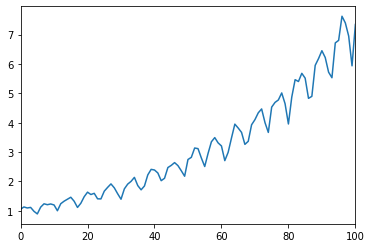

In [12]:
sin_data['Y'].plot()

## Categories

In [13]:
toy_datasets.load_breast_cancer().keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [14]:
b = toy_datasets.load_breast_cancer()

In [15]:
cat_data = pd.DataFrame(b['data'], columns = b['feature_names'])
cat_data['Y'] = pd.Series(b['target'], name = 'Y')

In [16]:
cat_data.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Y
0,17.99,10.38,122.80,"1,001.00",0.12,0.28,0.30,0.15,0.24,0.08,...,17.33,184.60,"2,019.00",0.16,0.67,0.71,0.27,0.46,0.12,0
1,20.57,17.77,132.90,"1,326.00",0.08,0.08,0.09,0.07,0.18,0.06,...,23.41,158.80,"1,956.00",0.12,0.19,0.24,0.19,0.28,0.09,0
2,19.69,21.25,130.00,"1,203.00",0.11,0.16,0.20,0.13,0.21,0.06,...,25.53,152.50,"1,709.00",0.14,0.42,0.45,0.24,0.36,0.09,0


In [17]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

## True/false

In [18]:
X = np.array([[3,9], [3,6], [6,9], [6,6],  [3,3], [6,3], [9,9], [9,6], [9,3]])
Y = np.array([1, 1, 1, 1, 0, 0, 0, 0, 0])

In [19]:
svm_data = pd.concat([
    pd.DataFrame(X, columns = ['x', 'y']),
    pd.Series(Y, name = 'label')
], axis = 1)

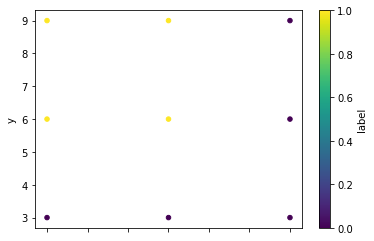

In [20]:
svm_data.plot(kind = 'scatter', x = 'x', y = 'y', c = 'label', colormap = 'viridis');

## Categories 2

In [21]:
from sklearn.datasets import load_iris

In [22]:
chi_data = pd.concat([
    pd.Series(['Blue' if np.random.rand() > 0.5 else 'Red' for x in range(1000)], name = 'shirt'),
    pd.Series(['Boy' if np.random.rand() > 0.5 else 'Girl' for x in range(1000)], name = 'gender')
], axis = 1)

In [23]:
chi_data.head(3)

,shirt,gender
0,Blue,Boy
1,Red,Girl
2,Blue,Girl


In [24]:
chi_data['TOTAL'] = 1

In [25]:
gender_totals = chi_data[['gender', 'TOTAL']]\
    .groupby(['gender'])\
    .count()\
    .reset_index()\
    .T
gender_totals.columns = ['Boy', 'Girl']
gender_totals = gender_totals[gender_totals['Boy'] != 'Boy']

In [26]:
shirt_totals = chi_data[['shirt', 'TOTAL']]\
    .groupby(['shirt'])\
    .count()\
    .reset_index()\
    [['TOTAL']]
shirt_totals.index = ['Blue', 'Red']
shirt_totals = shirt_totals.append(pd.Series(None, name = 'TOTAL'))
shirt_totals = shirt_totals.fillna(1000)

In [27]:
chi_totals = pd.concat([
    pd.concat([
        pd.crosstab(chi_data['shirt'], chi_data['gender']),
        gender_totals
    ]),
    shirt_totals
], axis = 1)

## House prices

In [28]:
b = toy_datasets.load_boston()

In [29]:
price_data = pd.DataFrame(b['data'], columns = b['feature_names'])
price_data['Y'] = pd.Series(b['target'], name = 'Y')

In [30]:
price_data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70


# Data mining and preparation

All basic methods needed to prepare data before creating model

## Good practices

In [31]:
# basic stuff so model can better comprehend data, sns pairplot
# visualization techniques, 3 sigm

## Standardization

In other words, making variable zero-mean with similar deviation as others. Most common is substructing mean of the original variable and then divide it by standard deviation. The drawback is, that by doing so you cannot interpret directly weights in some models (like linear regression), but only compare them and tell which one is more important.

What it does is that in some cases (mostly neaural networks) it is much easier for algorithm to optimize, it removes scale of units factor, and very often multicollinearity. Most ml libraries have already this functionality, so there is no need to write an extra code. 

It is important to use statistics (mean and std) only from training dataset and use they on validation set separately, so there won't be data leakage. 

You shoud do it in case of almost any modelling except tree based algorithms and logistic regression. Since it also changes PCA results it is a good practice to do it at the beginning.

More at: https://builtin.com/data-science/when-and-why-standardize-your-data

## Features selection

Techniques used to select features that matter for a model. The base idea needed to be mentioned is that every feature should have some logic behind it. In other words, you should first of all be able to explain for each used feature, **why** you use it.

### Chi squared (categorical features and label)

Chi squared is a test to determine whether there is a dependence between one variable and another. In order to calculate it you need observed values and expected ones - those values you calculate by aggregating data by selected feature and label, multiplying row and column counts, and substracting by total number of observations. 

$$(\text{row_total}*\text{column_total}) / \text{observation_count}$$

Then you use this value as expected frequency in this equation:

$$  
(\text{observed_freq} - \text{expected_freq})^2/\text{expected_freq}
$$

And you do it for every row/column combination. The result is a chi square statistic which needs to be compared with value from proper statistic table, having in mind proper degree of freedom and p value. If calculated value is higher then the one found in table, null hiphotesis is rejected which means that those two numbers are dependent.

Below is an example when I use chi squared statistic to determine whether there is a relationship betweem shirt color and wearer gender.

More: https://www.ling.upenn.edu/~clight/chisquared.htm

In [32]:
chi_totals

,Boy,Girl,TOTAL
Blue,251,243,494.00
Red,252,254,506.00
TOTAL,503,497,"1,000.00"


In [33]:
from sklearn.feature_selection import chi2

In [34]:
pd.get_dummies(chi_data['shirt']).head(5)

,Blue,Red
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [35]:
chi2(pd.get_dummies(chi_data['shirt']), chi_data['gender'])

(array([0.0513405 , 0.05012294]), array([0.8207469 , 0.82284948]))

There are large p values (second array), so we keep null hypothesis, which means that those values are not dependent.

### Recursive elimination

### Pearson correlation

It is a measyre of the linear correlation between two variavles. Important is to remember that it is just correlation, it does not imply causation. It is not sensitive to scale, but is sensitive to outliers, hence, it is a good practice to remove them based on 3 sigma rule before calculating correlation.

0 means that there is no correlation between two variables, high negative numbers implies negative correlation, high positive number implies positive correlation. The threshold is around -0.5/0.5.

More: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [36]:
price_data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70


In [37]:
all_obs_corr = price_data.corr()[['Y']].sort_values('Y')
all_obs_corr.columns = ['All obs corr']

In [38]:
filtered_obs_corr = price_data[
    (price_data > price_data.mean() - 2*price_data.std()) &
    (price_data < price_data.mean() + 2*price_data.std())
].corr()[['Y']].sort_values('Y')
filtered_obs_corr.columns = ['95% obs corr']

In [39]:
all_corr = pd.concat([
    all_obs_corr,
    filtered_obs_corr
], axis = 1, sort = False)
all_corr['diff'] = abs(all_corr['All obs corr'] - all_corr['95% obs corr'])

In [40]:
all_corr

,All obs corr,95% obs corr,diff
LSTAT,-0.74,-0.78,0.05
PTRATIO,-0.51,-0.44,0.07
INDUS,-0.48,-0.63,0.15
TAX,-0.47,-0.60,0.13
NOX,-0.43,-0.59,0.17
CRIM,-0.39,-0.53,0.14
RAD,-0.38,-0.51,0.13
AGE,-0.38,-0.53,0.16
CHAS,0.18,nan,nan
DIS,0.25,0.45,0.20


As you can see in some cases removing outliers (5% observations) changes pearson correlation significantly. In this case there is one, maybe two positive correlated features with Y, and few features which correlate negatively with Y, and those are the features we would like to use in model.

### F statistics

### Autocorrelation

The more appropriate term here would be a partial autocorrelation, since it uses a formula better fitted for this task. It is about determining whether there is a correlation between y and its previous values, and is used in time series, if you suspect that y value is dependent on its previous values. 

More: https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

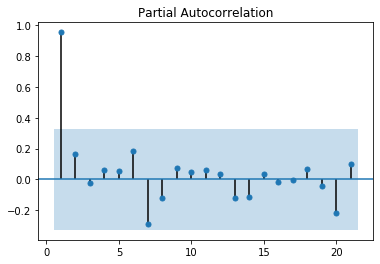

In [42]:
plot_pacf(sin_data['Y'], alpha = 0.001, zero = False);

The graph above indicates that in this time series data there is a AR(1) process, which means that Y(t) value is (strongly) related to its previous value Y(t-1). Hence, we should use it as a feature in our model. 

### Tree based selection

## Principal component analysis

# Algorithms

Most fundamental and important algorithms and approaches how to do ml

## Supervised

Supervised - that means that we have label

### Continuous label

When there is a numerical value to predict, like stock price, number of bought products, or days until user log in.

#### Linear regression

The most simple algorithm, yet very usefull and sufficient for many problems. The good thing is that it is very easy to get feature importance and know which features had most impact. This model only sees linear interdependences, so it cannot tell me "feature 1 together with feature 2 did something", but "feature 1 alone did something and feature 2 alone did something".

1. Pros


- easy to use
- easy to get feature importances
- easy to interpret


2. Cons


- does not get non-linear dependencies
- does not get 'combined' dependencies


3. When to use?

In simple problems, when we need to say exactly how much did label change on average if we change feature for one unit.

##### Scikit learn

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression().fit(exp_data[['X']].values, exp_data['Y'])

In [45]:
exp_data['Y^'] = model.predict(exp_data[['X']])

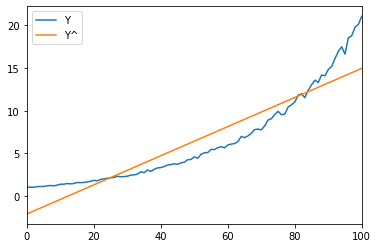

In [46]:
exp_data[['Y', 'Y^']].plot()

In [47]:
exp_data.iloc[3]

X     0.09
Y     1.12
Y^   -1.56
Name: 3, dtype: float64

In [48]:
model.intercept_

-2.069031862263847

In [49]:
model.coef_

array([5.67128832])

In [50]:
round(model.coef_[0] * 0.090000 + model.intercept_, 6)

-1.558616

As you can clearly see we managed to find a dependency and can easily interpret weight by saying that by incerasing X by 1 unit Y incerases by 5.62 on average. But, also clearly, there is a nonlinear dependency which we cannot get it with this model. We can now manually add more features by calculating squares cubes etc. or using existing solution for example from sklearn.

#### Nonlinear regression

Extension of linear regression, it is about adding nonlinear transformation of features.

1. Pros


- easy to use
- easy to get feature importances
- get non-linear dependencies


2. Cons


- does not get 'combined' dependencies
- cannot interpret weights features


3. When to use?

In simple problems, when we suspect that there is a nonlinear dependency in model.

##### Scikit learn

In [51]:
exp_data['X^2'] = exp_data['X']**(2)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
model = LinearRegression().fit(exp_data[['X^2']], exp_data['Y'])

In [54]:
exp_data['Y^'] = model.predict(exp_data[['X^2']].values)

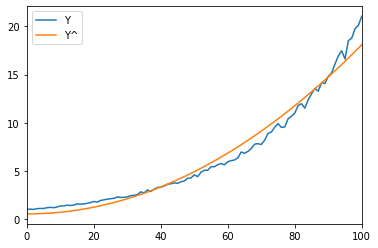

In [55]:
exp_data[['Y', 'Y^']].plot()

In [56]:
exp_data.iloc[3]

X     0.09
Y     1.12
Y^    0.59
X^2   0.01
Name: 3, dtype: float64

In [57]:
model.intercept_

0.5733499036419722

In [58]:
model.coef_

array([1.94512461])

In [59]:
round(model.coef_[0] * 0.008100 + model.intercept_, 6)

0.589105

#### Auto regression

Simply putting in, it is about adding lag y values to model faetures. We assume by that that y values are dependent on previous ones.

1. Pros


- fairly simple and easy to do
- lots of different methods (ARMA, ARIMA, ARCH, GARCH and more)


2. Cons


- weak on long term (next prediction depends on model's previous predictions, so the more predictions we need the bigger error becomes)
- fails with very seasonal data


3. When to use?

Then there is not enough features to predict y value


4. More info on how to evaluate lag intervals check data preparation -> correlogram

##### Scikit learn

In [60]:
exp_data['Y(t-1)'] = exp_data['Y'].shift(1)
exp_data = exp_data.dropna()

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
model = LinearRegression().fit(exp_data[['Y(t-1)']].values, exp_data['Y'])

In [63]:
exp_data['Y^'] = model.predict(exp_data[['Y(t-1)']].values)

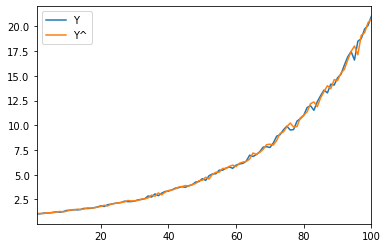

In [64]:
exp_data[['Y', 'Y^']].plot()

In [65]:
model.coef_

array([1.03258105])

It was easy since growth of y value is constant.

In [66]:
no_lags = 1

In [67]:
for i in range(1, no_lags+1):
    sin_data['Y(t-'+str(i)+')'] = sin_data['Y'].shift(i)
sin_data = sin_data.dropna()

In [68]:
sin_data.head(3)

,X,Y,Y(t-1)
1,1.00,1.13,1.05
2,2.00,1.09,1.13
3,3.00,1.11,1.09


In [69]:
model = LinearRegression().fit(sin_data[['Y(t-'+str(i)+')' for x in range(1, no_lags+1)]].values, sin_data['Y'])

In [70]:
sin_data['Y^'] = model.predict(sin_data[['Y(t-'+str(i)+')' for x in range(1, no_lags+1)]].values)

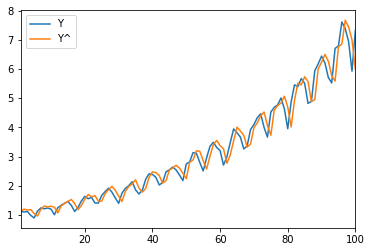

In [71]:
sin_data[['Y', 'Y^']].plot()

In [72]:
model.coef_

array([0.99920558])

But now we should say according to weight that y value is by average 99% of its previous value, which does not fit long term picture.

#### Theil-sen estimator

### Category label

When model is based on categories to predict, like animal type, product id or true/false. We then either 
- encode those categories into numerical values (we use when it is 'the more the better', for example categories like rare_buyer:1, avg_buyer:2, frequent_buyer:3, so model can find relationships easily) 
- leave string categories as it is (some tools support it)
- or create dummy labels (one true/false column for each distinct label value)

In case of dummy labels and intention that model should work on new categories, we need to handle unknown labels by changing a few existing categories into "unknown" label, so when data changes model can still work with it.


#### Decision tree

Decision tree is very friendly, easy to use and fits perfectly for problems when there are not too much features and we need to explain clearly decision path. It works iteratively and splits dataset into two subsets based on if statements for each feature. It selects automatically the best features based on choosen criterion, for example gini impurity. If it cannot split data for more pure subsets (leafs) it stops.


##### 1. Pros


- easy to use
- easy to interpret
- gets nonlinear relationship
- gets combined realtionship
- easy to get feature importance
- can work with both categorical and numerical data
- works with missing data


##### 2. Cons


- in most cases gets only combined dependencies
- in most cases, because of leaf's inpurity, there is no certain feature interpretation 
- should not use too much features
- inaccuracy


##### 3. When to use?


In simple problems and when we need to explain what was a path which leads to decision


##### 4. Important hiperparameters:


- criterion to measure split quality - it tells us how good or bad was split based on selected feature
- max depth - maximum depth of a tree on any of its branches
- min samples split - number of records in node so it can be splited
- min samples leaf - number of records needed to be in leaf after splitting a node
- max features - number of features to use
- min impurity decrease - minimum difference between impurity in existing node and new ones 

##### Scikit learn

In [73]:
cat_data.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Y
0,17.99,10.38,122.80,"1,001.00",0.12,0.28,0.30,0.15,0.24,0.08,...,17.33,184.60,"2,019.00",0.16,0.67,0.71,0.27,0.46,0.12,0
1,20.57,17.77,132.90,"1,326.00",0.08,0.08,0.09,0.07,0.18,0.06,...,23.41,158.80,"1,956.00",0.12,0.19,0.24,0.19,0.28,0.09,0
2,19.69,21.25,130.00,"1,203.00",0.11,0.16,0.20,0.13,0.21,0.06,...,25.53,152.50,"1,709.00",0.14,0.42,0.45,0.24,0.36,0.09,0


In [74]:
cat_data.shape # no records and features

(569, 31)

In [75]:
from sklearn.tree import DecisionTreeClassifier
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [76]:
clf = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 10,
    min_samples_split = 30,
    max_features = 15,
    min_impurity_decrease = 0.01
)

In [77]:
clf.fit(cat_data.drop('Y', axis = 1).values, cat_data['Y'].values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [78]:
string_data = StringIO()
export_graphviz(
    clf, rounded = True, filled = True, precision = 1,
    feature_names = cat_data.drop('Y', axis = 1).columns,
    out_file = string_data
)

In [79]:
graph = pydotplus.graph_from_dot_data(string_data.getvalue()) 

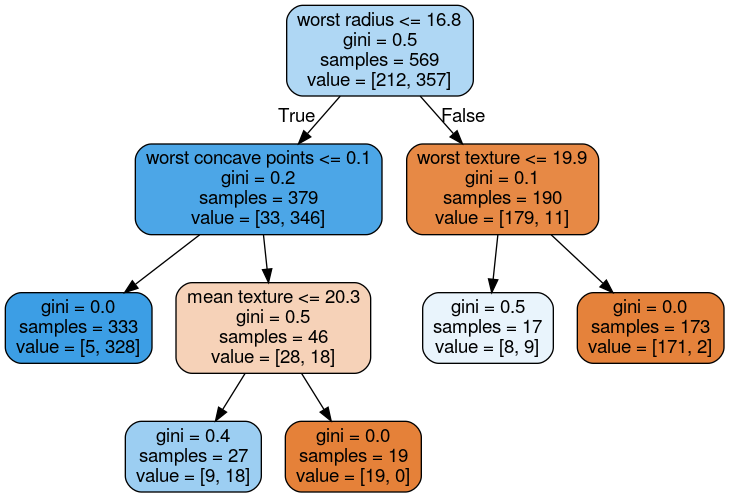

In [80]:
Image(graph.create_png())

The first node is the root node, then there are nodes which split data into smaller subsets based on selected features based on gini value, and at the end there are leaf nodes with subsets of data. 

#### Random forest

Random forest is combination of many different decision trees. First we choose randomly samples from dataset to create bootstrap dataset, the important thing here is that same record can be found in that dataset multiple times. With that set of records we create N times decision tree, but each time, at each node, we choose subset of features to check purity criterion. We do it that way, so decision trees will be different and random across random forest. Prediction is calculating by voting and chosing option with most votes. The final model is validated with records not included in bootstrap dataset, which is called out-of-mag dataset. 

##### 1. Pros


- much better accuracy then decision tree
- still easy to use and understand
- gets combined and non linear dependencies
- can work with numerical and categorical data
- works with missing data
- hard to overfit


##### 2. Cons


- almost not interpretable (black box)


##### 3. When to use

When we need to handle more complex problems but still don't have much resources

##### 4. Important hiperparameters

- n estimators - number of decision trees
- bootstrap - whether to use bootstrap dataset to train or whole one
- max features - number of features to select randomly for each tree in forest

##### Scikit learn

In [81]:
cat_data.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Y
0,17.99,10.38,122.80,"1,001.00",0.12,0.28,0.30,0.15,0.24,0.08,...,17.33,184.60,"2,019.00",0.16,0.67,0.71,0.27,0.46,0.12,0
1,20.57,17.77,132.90,"1,326.00",0.08,0.08,0.09,0.07,0.18,0.06,...,23.41,158.80,"1,956.00",0.12,0.19,0.24,0.19,0.28,0.09,0
2,19.69,21.25,130.00,"1,203.00",0.11,0.16,0.20,0.13,0.21,0.06,...,25.53,152.50,"1,709.00",0.14,0.42,0.45,0.24,0.36,0.09,0


In [82]:
cat_data.shape # no records and features

(569, 31)

In [83]:
from sklearn.ensemble import RandomForestClassifier
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [84]:
clf = RandomForestClassifier(
    n_estimators = 10,
    bootstrap = True,
    max_features = 10,
    
    criterion = 'gini',
    max_depth = 10,
    min_samples_split = 10,
    min_impurity_decrease = 0.01
)

In [85]:
clf.fit(cat_data.drop('Y', axis = 1).values, cat_data['Y'].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
def draw_tree(idx):
    string_data = StringIO()
    export_graphviz(
        clf.estimators_[idx], rounded = True, filled = True, precision = 1,
        feature_names = cat_data.drop('Y', axis = 1).columns,
        out_file = string_data
    )
    graph = pydotplus.graph_from_dot_data(string_data.getvalue()) 
    return Image(graph.create_png(), width = 600)

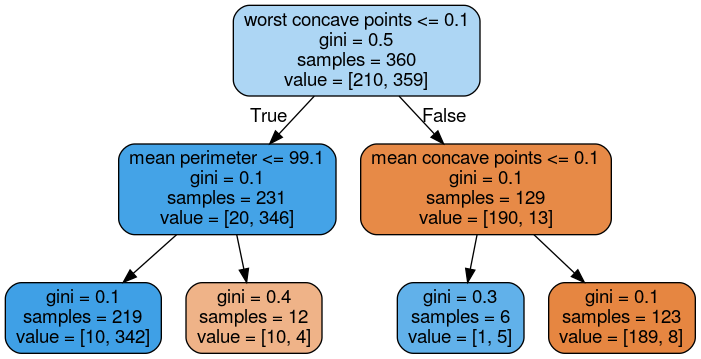

In [87]:
draw_tree(0)

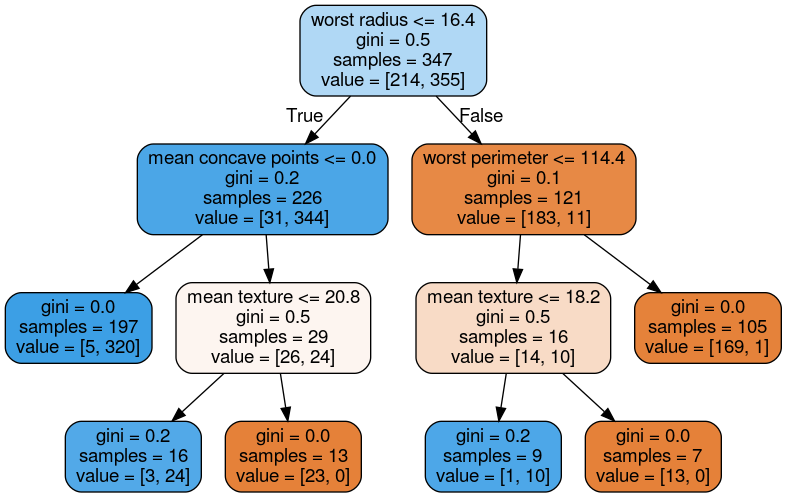

In [88]:
draw_tree(1)

As you can see on those two trees from random forest they are completely different.

#### Logistic regression

Logistic regression returns weights in same manner as linear regression, and you can interpret them in same easy way. The outcome is a probability measure for each class, and based on threshold you choose every sample is classified as a corresponding class. It uses maximum likelihood for parameter estimation, which is solved with a help of Newton Raphson method. 

That model is, by viewing from how it is dependent from weights, a linear model, but the final outcome is non-linear (thanks to the sigmoid function). In theory it is a non linear model, but it is not an obvious thing, so if you are interested in that take a look at https://www.quora.com/Why-is-logistic-regression-considered-a-linear-model


##### 1. Pros


- easy to use
- easy to interpret


##### 2. Cons


- finds only linear and not combined dependencies


##### 3. When to use?


It is perfect in binary classification problems


##### 4. Important hiperparameters:

- penalty - how to penalize model so it won't overfit
- max iter - how many iterations to make
- solver - used algorithm (more: https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions)
- fit intercept - if a constant should be added to a model 


More: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5543767/

##### Sklearn

In [90]:
from sklearn.linear_model import LogisticRegression

In [92]:
cat_data.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Y
0,17.99,10.38,122.80,"1,001.00",0.12,0.28,0.30,0.15,0.24,0.08,...,17.33,184.60,"2,019.00",0.16,0.67,0.71,0.27,0.46,0.12,0
1,20.57,17.77,132.90,"1,326.00",0.08,0.08,0.09,0.07,0.18,0.06,...,23.41,158.80,"1,956.00",0.12,0.19,0.24,0.19,0.28,0.09,0
2,19.69,21.25,130.00,"1,203.00",0.11,0.16,0.20,0.13,0.21,0.06,...,25.53,152.50,"1,709.00",0.14,0.42,0.45,0.24,0.36,0.09,0


In [201]:
log_reg = LogisticRegression(
    penalty = 'l2',
    max_iter = 80,
    solver = 'newton-cg',
    fit_intercept = True
)

In [202]:
log_reg.fit(cat_data[cat_data.columns[:-1]], cat_data['Y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=80,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

There are weights for each feature

In [203]:
print(cat_data.columns[:2].tolist(), log_reg.coef_[0][:2])

['mean radius', 'mean texture'] [1.01457548 0.18137834]


Estimated probabilities

In [204]:
np.round(log_reg.predict_proba(cat_data.iloc[18:20, :30]), 2)

array([[1.  , 0.  ],
       [0.01, 0.99]])

And classes

In [205]:
log_reg.predict(cat_data.iloc[18:20, :30])

array([0, 1])

##### Statmodels

#### Support vector machine

Support vector machine is a support vector classifier with use of kernel functions. What it does is change input by changing its dimensionality (with use of kernel functions) and finds lines (hyperplanes) which sepparates processed data the best. The boundary is found by finding a Maximum Margin Hyperplane, with biggest distance between most outlier datapoints in both datasets. It allows missclassification, since the data can overlap.

##### 1. Pros


- effective in case of having a lot of features and less samples
- easy o interpret with one or two features
- can witk with non linear dependencies (but have to use kernel functions)


##### 2. Cons


- not interpretable (black box) in case of more then two dimensions or using kernel functions
- hard to train if labels are overlapping or there is a big noise
- innefective with big datasets (resource costly)


##### 3. When to use

When there is small dataset with lots of features

##### 4. Important kernel functions

- polyomial
- radial basis 
- sigmoid

##### 5. More info: http://mfcabrera.com/files/notebooks/SVM-Slides.html

##### Scikit learn

In [90]:
from sklearn.svm import SVC

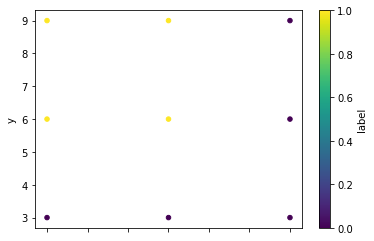

In [91]:
svm_data.plot(kind = 'scatter', x = 'x', y = 'y', c = 'label', colormap = 'viridis');

In [92]:
clf = SVC(gamma = 0.2)

In [93]:
clf.fit(svm_data[['x', 'y']].values, svm_data['label'].values)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [94]:
xx, yy = np.meshgrid(np.linspace(3, 9, 100),
                     np.linspace(3, 9, 100))
z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

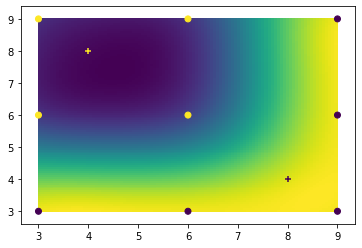

In [95]:
plt.pcolormesh(xx, yy, -z, cmap = plt.cm.viridis)
plt.scatter(svm_data['x'], svm_data['y'], c = svm_data['label'])
plt.scatter([4,8], [8,4], c = [1,0], marker = '+')

In [96]:
clf.predict([[4, 8]])

array([1])

In [97]:
clf.predict([[8, 4]])

array([0])

desc

## Not supervised

There is no label, we talk about it then sometimes as clusterization

### K-means ++

# Validation

Ways to validate how good is model

## Supervised

Some methods you can use only for continuous label and some only for categorical label. I gathered everything related to this topic here, so keep in mind that some of those methods you can use together.

### Error (continuous label)

An error in statistics is a difference between an observed and predicted value. It is used in validation to say how much, on average, model misses with its prediction. There are few different ones, but the most important and popular are mean squared error and mean absolute error, both of them can be interpreted.

In [100]:
from sklearn.metrics import mean_absolute_error

In [101]:
mean_absolute_error(exp_data['Y'], exp_data['Y^'])

0.22739047468992624

In case of model created above, on average it misses prediction with real values by 0.23 (units)

### R squared (continuous label)

R squared, or coefficient of determination, is a measure in how many percent model is able to explain predictable value, or in other, more proper words, is a proportion of the variance for a dependent variable that is explained by model's features in regression model to overall variance.

The good thing is that sometimes low r squared does not implies that a model is bad - in some cases the variance is just too high and cannot be explained. Similar thing works in other way around - high r squared does not mean that model is good.

More: https://statisticsbyjim.com/regression/interpret-r-squared-regression/

In [110]:
from sklearn.metrics import r2_score

In [111]:
r2_score(exp_data['Y'], exp_data['Y^'])

0.9960059516946487

Just by looking at r squared model I created earlier seems to be a very good fit. Take a look at next chapter (residual plot) to find out why it is not true.

### Residual plot (continuous label)

The general idea here is to give you more information about how well regression model fits data. It does so by calculating difference between predicted and actual value and plotting it so you can see how do residuals look like. Thanks to this the slope is removed and some things can be seen more clearly, like wether variance incerases over time or there is some non - linear dependency. Using it you can improve quality of your model.

More: https://www.youtube.com/watch?v=iMdtTCX2Q70

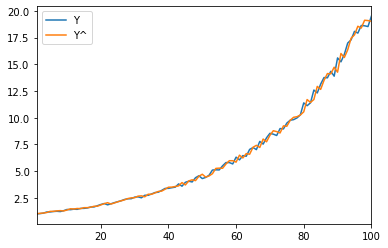

In [109]:
exp_data[['Y', 'Y^']].plot()

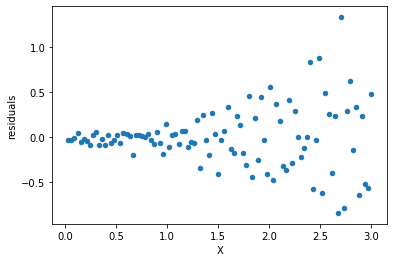

In [107]:
exp_data['residuals'] = exp_data['Y'] - exp_data['Y^']
exp_data[['X', 'residuals']].plot(kind = 'scatter', x = 'X', y = 'residuals')

Here it is very clear that model made in previous chapters didn't fit data well, despite the fact that Y and Y^ values looked really good.

### Accuracy, Precision, Recall (category label)

1. Accuracy - correctly predicted observations to the total observations

How many survivors you classified correctly?
2. Precision - correctly predicted **positive** observations to the total **predicted positive** observations

From those who we classified as survived, how many did actually survived?
3. Recall - correctly predicted **positive** observations to the total **positive** observations

From those who survived, how many did you label>

### Cross validation (continuous and category label)

### Rolling cross validation (continuous and category label)

### Confusion matrix (categorical label)

### F statistics (continuous label)

### Receiver operating characteristic (ROC) curve (category label)

The idea is to summarize confusion matrixes, which emerged from choosing differen threshold for distinguishing between two classes based on their probability.

For each threshold which gives us different results, you calculate two metrics: true positive rate (correctly classified true samples) and false positive rate (when false sample is classified as true). For each distinct values you plot them on a chart and connect the dots, which gives a ROC curve, and an area below it is called AUC, which can be used to compare results across different models.

Instead of sensitivity we can use precision in case of label inbalance, of example in case of classifying rare diseases.   

In [206]:
from sklearn.metrics import roc_curve, auc

In [207]:
fpr, tpr, th = roc_curve(cat_data['Y'], log_reg.predict_proba(cat_data.iloc[:, :30])[:, 1])
auc = auc(fpr, tpr)

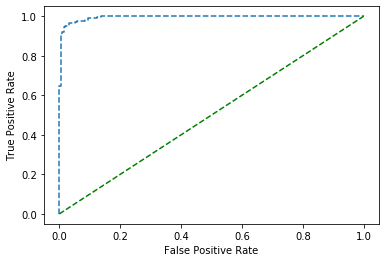

In [210]:
plt.plot(fpr, tpr, linestyle = '--');
plt.plot([0, 1], [0, 1], color='green', linestyle='--');
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');

In [212]:
round(auc, 3)

0.995

### Lift (category label)

## Unsupervised

In [39]:
# gold standard (hand labeled)

# Statistical tests

In [120]:
# chi^2, white test, autoregresja skladnikow resztowych, reszty rozklad normalny?, 
# wald test

# Hiperparameter optimization tools

# Others

### Data leakage

<a id = 'data_leakage'></a>

In [119]:
# predicting change instead of value, nnls, ensemble learning, parallelism in ml
# distributions, mean vs median, robust statistics, 

In [121]:
# optimizers, errors, bias/variance tradeoff, validation problem in time series 

In [38]:
# data leakage, parametric statistics, p-value, multicollinearity